In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cell_tidy_data.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'CellClass', 'l1-umap_0', 'l1-umap_1', 'l1-tsne_0', 'l1-tsne_1',
       'MajorType', 'l2-umap_0', 'l2-umap_1', 'l2-tsne_0', 'l2-tsne_1',
       'SubType', 'l3-umap_0', 'l3-umap_1', 'l3-tsne_0', 'l3-tsne_1',
       'L1CellClass', 'class_tsne_0', 'class_tsne_1', 'class_umap_0',
       'class_umap_1', 'Order', 'RegionName', 'MajorRegion', 'SubRegion',
       'DetailRegion', 'PotentialOverlap (MMB)', 'Anterior (CCF coords)',
       'Posterior (CCF coords)', 'MajorRegionColor', 'SubRegionColor',
       'DissectionRegionColor', 'Replicate'],
      dtype='object')

In [4]:
from matplotlib import rc

labelsize = 6
linewidth = 0.5
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)


In [5]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()


cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

In [6]:
major_type_order = [
    'ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC', 'VLMC-Pia', 'IT-L23',
    'IT-L4', 'IT-L5', 'IT-L6', 'PT-L5', 'CT-L6', 'NP-L6', 'L6b', 'EP', 'CLA',
    'OLF-Exc', 'Gfra1', 'IG-CA2', 'DG-po', 'CA3', 'CA3-St18', 'CA1', 'DG',
    'ANP', 'OLF', 'MGE-Pvalb', 'MGE-Sst', 'CGE-Vip', 'CGE-Lamp5', 'Unc5c',
    'Chd7', 'LSX-Inh', 'PAL-Inh', 'Foxp2', 'MSN-D1', 'MSN-D2', 'D1L-Fstl4',
    'D1L-PAL'
]

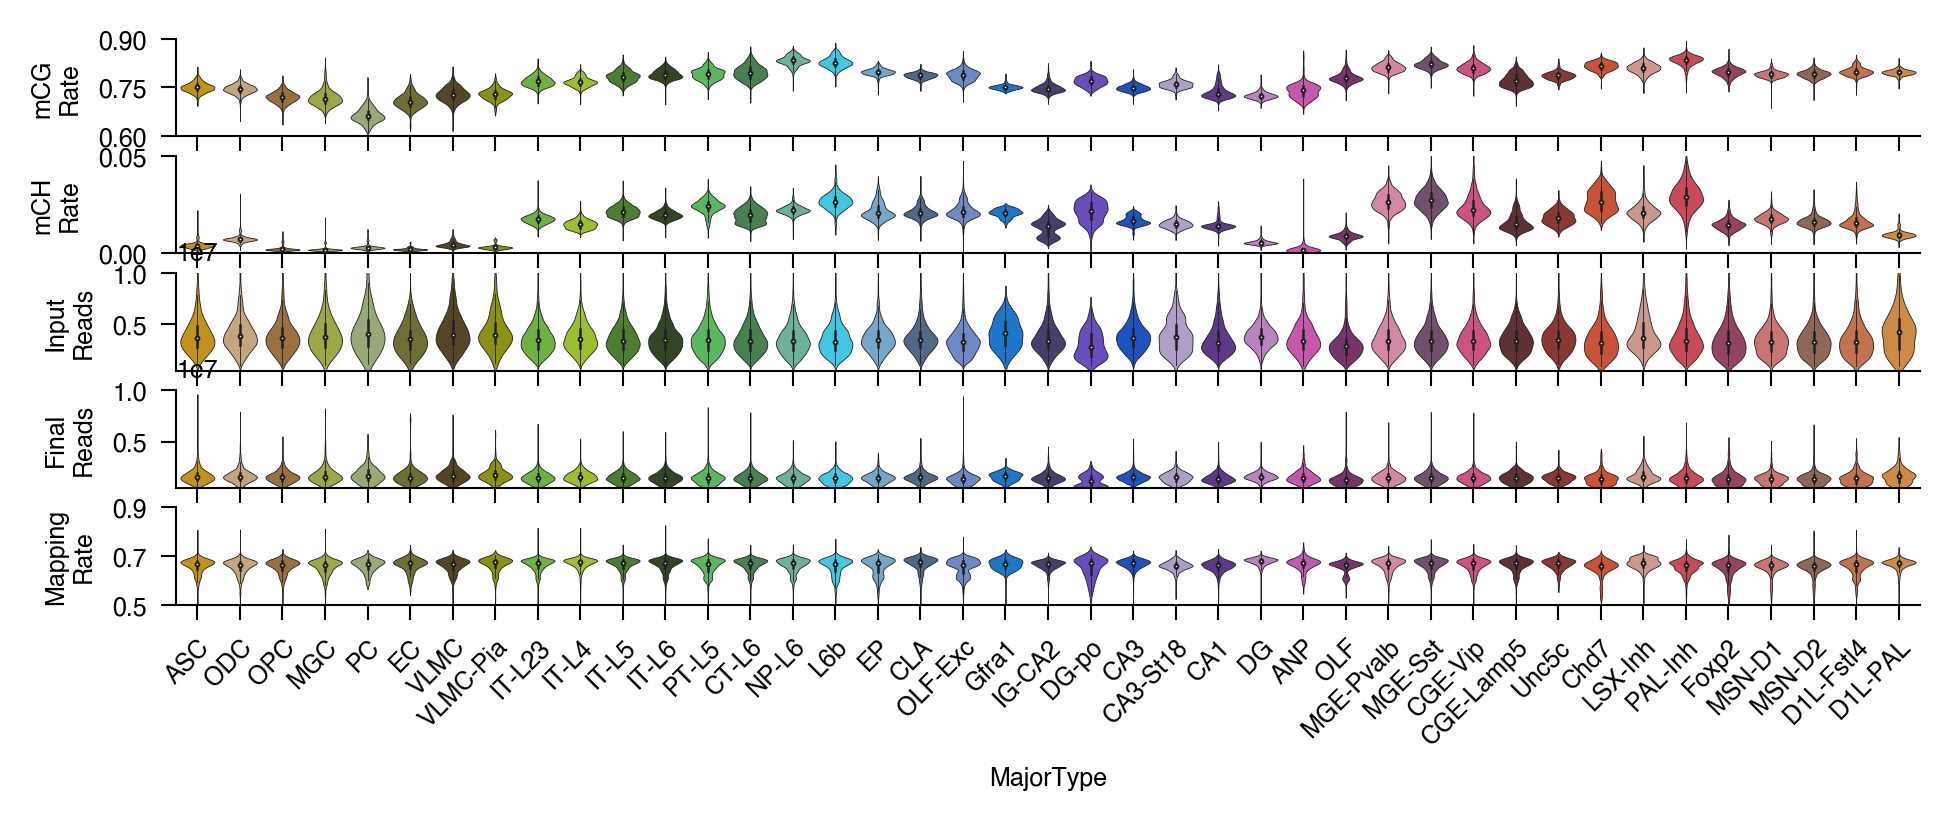

In [18]:
metric_cols = [
    'CG_RateAdj', 'CH_RateAdj', 'InputReads', 'FinalReads', 'MappingRate'
]
ylabels = [
    'mCG\nRate', 'mCH\nRate', 'Input\nReads', 'Final\nReads', 'Mapping\nRate'
]
ylims = [(0.6, 0.9), (0, 0.05), (5e5, 1e7), (5e5, 1e7), (0.5, 0.9)]
yticks = [(0.6, 0.75, 0.9), (0, 0.25, 0.05), (0, 0.5e7, 1e7), (0, 0.5e7, 1e7),
          (0.5, 0.7, 0.9)]
fig, axes = plt.subplots(figsize=(7.5, 0.5 * len(metric_cols)),
                         dpi=300,
                         nrows=len(metric_cols),
                         sharex=True)

for col, ax, ylim, ytick, ylabel in zip(metric_cols, axes.flat, ylims, yticks,
                                        ylabels):
    sns.violinplot(ax=ax,
                   linewidth=0.2,
                   data=cell_tidy_data,
                   x='MajorType',
                   scale='width',
                   y=col,
                   palette=major_type_palette,
                   order=major_type_order)
    ax.set(ylim=ylim, yticks=ytick, ylabel=ylabel)
    if not ax.is_last_row():
        ax.set(xlabel='')
    
    for t in ax.xaxis.get_ticklabels():
        t.set(rotation=45, rotation_mode='anchor', ha='right')
    sns.despine(ax=ax)

fig.savefig('MajorType.mapping_metric.violin.pdf')

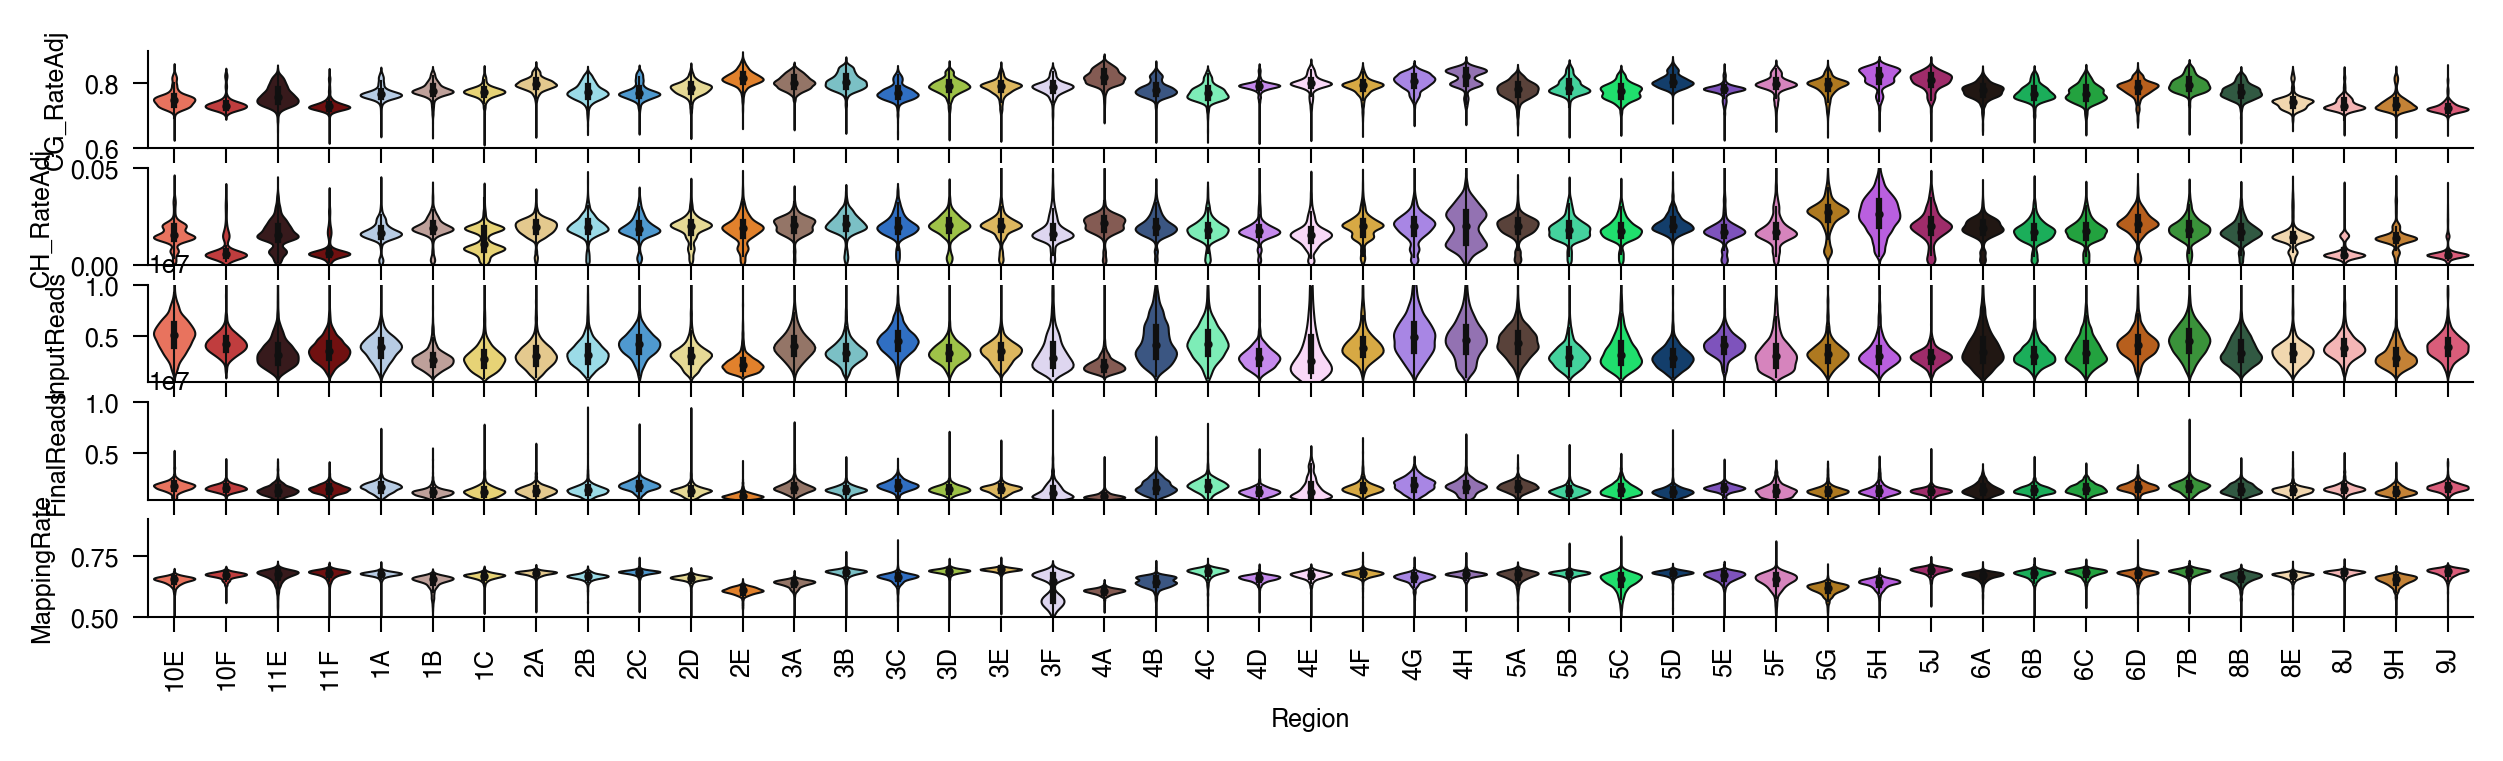

In [8]:
metric_cols = ['CG_RateAdj', 'CH_RateAdj', 'InputReads', 'FinalReads', 'MappingRate']
ylims = [(0.6, 0.9), (0, 0.05), (5e5, 1e7), (5e5,1e7), (0.5, 0.9)]
fig, axes = plt.subplots(figsize=(10, 0.5*len(metric_cols)), 
                         dpi=300, nrows=len(metric_cols), sharex=True)

for col, ax, ylim in zip(metric_cols, axes.flat, ylims):
    sns.violinplot(ax=ax, linewidth=0.5,
              data=cell_tidy_data,
              x='Region',scale='width',
              y=col,
              palette=region_palette,
              )
    ax.set(ylim=ylim)
    if not ax.is_last_row():
        ax.set(xlabel='')
    ax.xaxis.set_tick_params(rotation=90)
    sns.despine(ax=ax)